
# DIABETIC RETINOPATHY PREDICTION IN PATIENTS


## Business Objective: The variable to be predicted has two values (positive or negative on diabetic retinopathy). Thus, this is a binary classification project. The goal here is to predict whether a patient will suffer from diabetic retinopathy or not, conditioned on blood test features.

In [3]:
# Import the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the  dataset
df = pd.read_csv("pronostico_dataset.csv", delimiter = ';')
df.head() # Display First 5 Rows

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [5]:
# Basic Informatiom
df.shape # Display the number of column and row 

(6000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [7]:
df.isnull().sum() # Display the null values

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [8]:
df[df.duplicated()] # Finding Duplicates
# df.drop_duplicates() # Removing Duplicates

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [9]:
# Desciptive Statistics
df.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


In [10]:
df1 = df.drop("ID", axis = 1) # Drop the ID Column it is not usefull 
df1.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [11]:
# Data Analysis
# Categorical column
df1.prognosis.value_counts()

prognosis
retinopathy       3087
no_retinopathy    2913
Name: count, dtype: int64

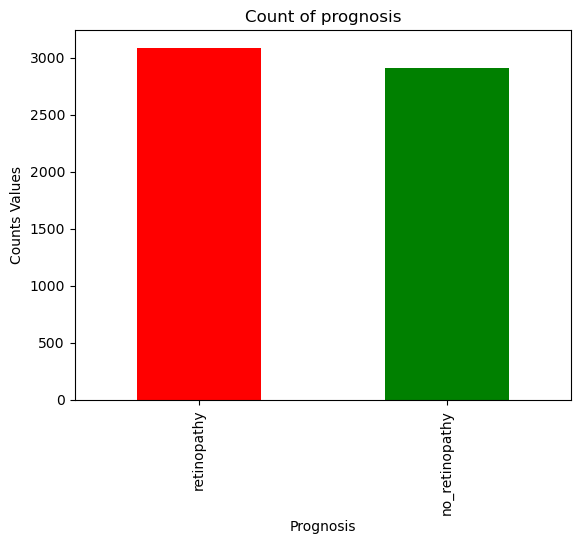

In [12]:
colors = ['red' , 'green']
df1.prognosis.value_counts().plot.bar(color = colors)
plt.title("Count of prognosis")
plt.xlabel("Prognosis")
plt.ylabel("Counts Values")
plt.show()
          

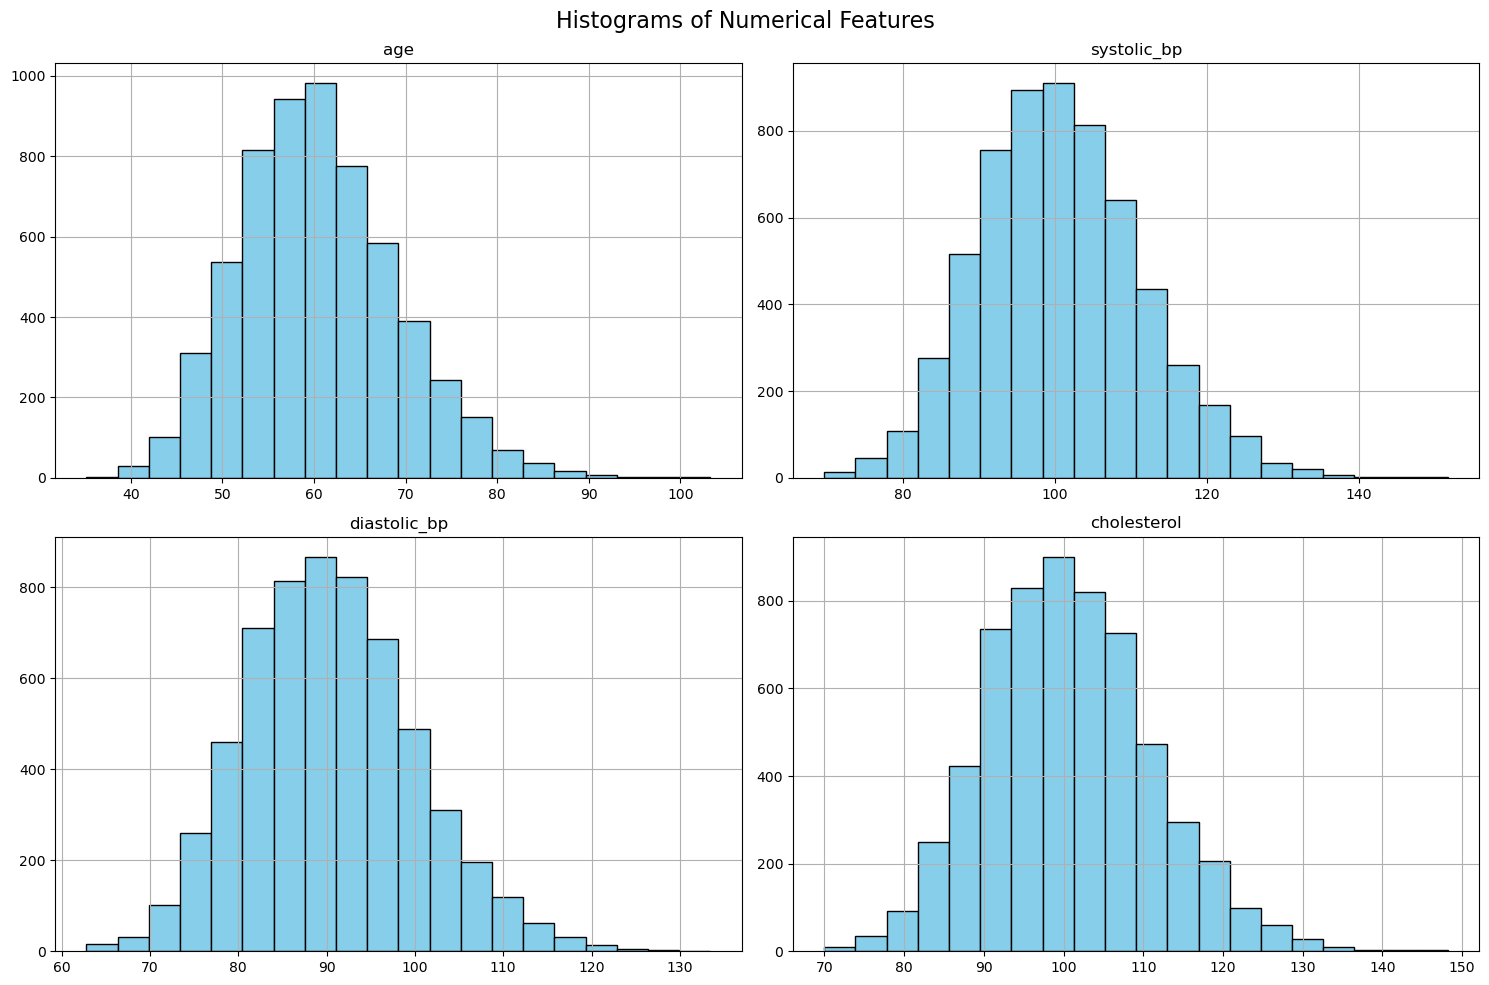

In [13]:
# Histogram for all Numerical Columns
df1.hist(bins = 20, figsize = (15,10), color = "skyblue", edgecolor = 'black')
plt.suptitle("Histograms of Numerical Features", fontsize = 16)
plt.tight_layout()
plt.show()
         

# Outlier Detection & Treatment

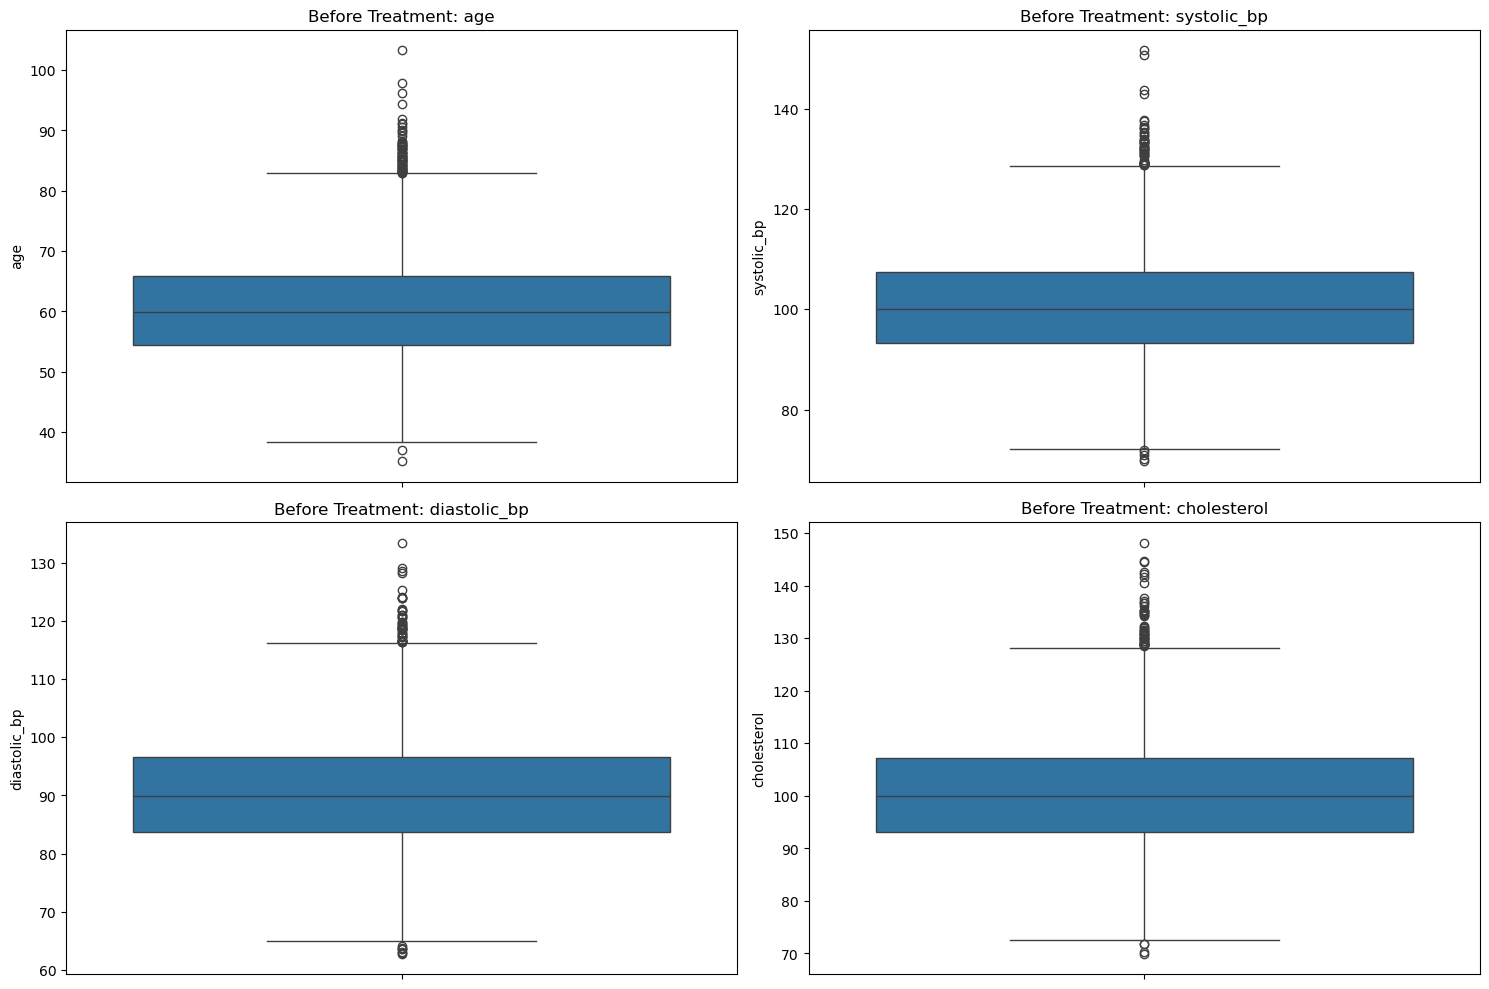

In [15]:
# Select numerical columns
numerical_cols = df1.select_dtypes(include='number').columns

# Function to detect and treat outliers using IQR
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df1[column] = np.where(df1[column] < lower_bound, lower_bound, df[column])
    df1[column] = np.where(df1[column] > upper_bound, upper_bound, df[column])
    return df

# Visualize outliers before treatment
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df1[col])
    plt.title(f'Before Treatment: {col}')
plt.tight_layout()
plt.show()


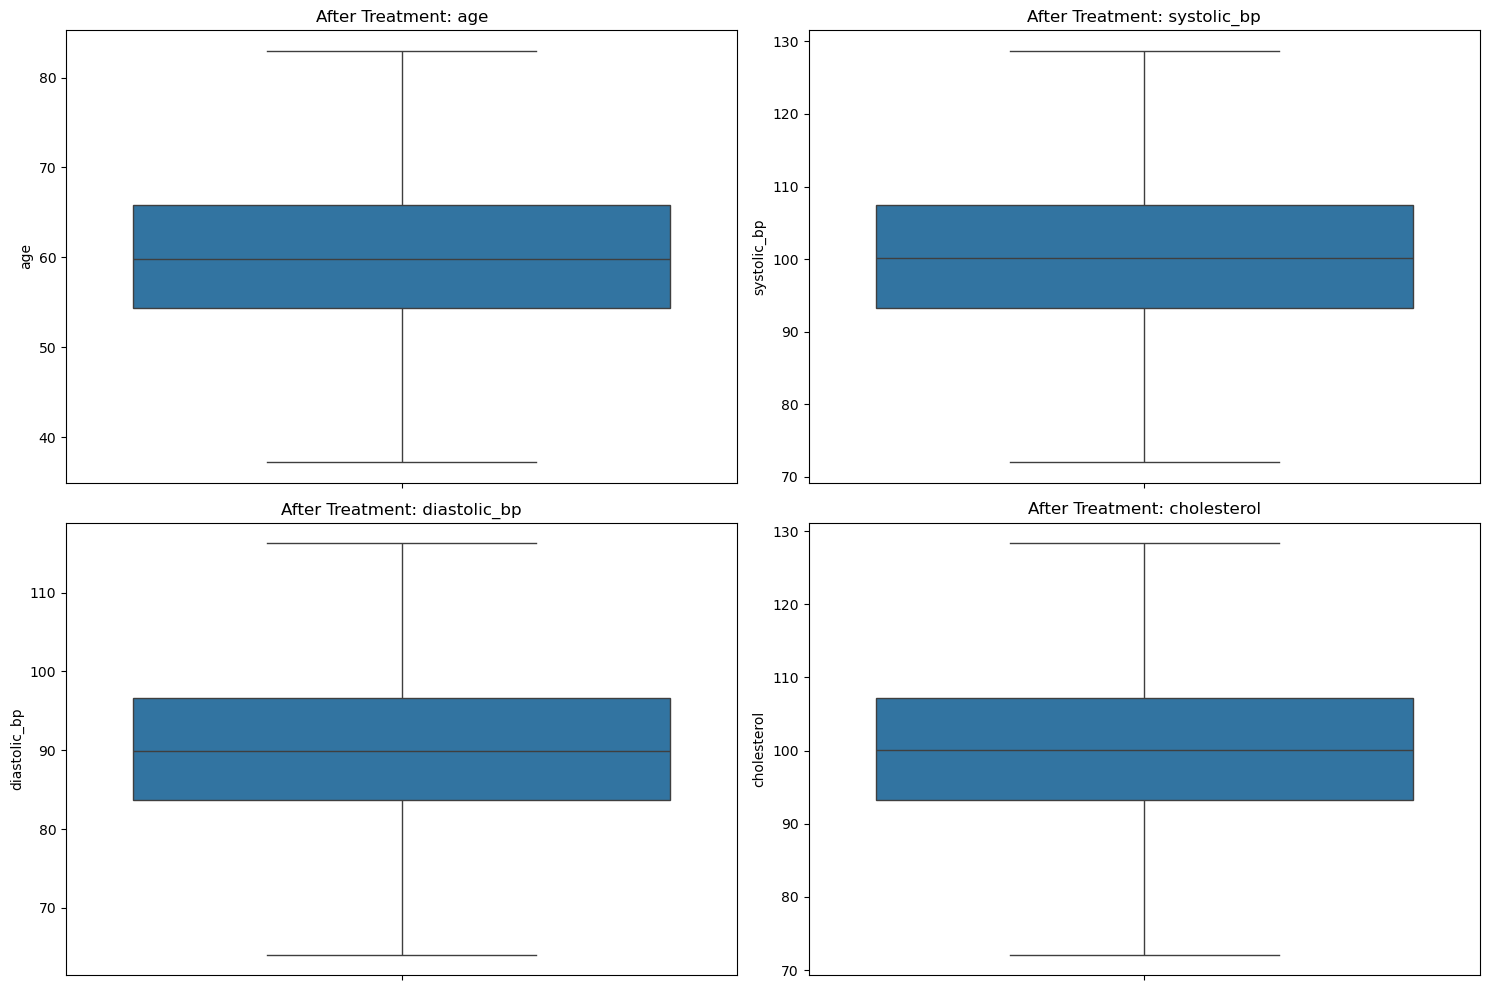

In [16]:
#Treat outliers for all numerical columns
for col in numerical_cols:
    df1 = treat_outliers_iqr(df1, col)

# Visualize outliers after treatment
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df1[col])
    plt.title(f'After Treatment: {col}')
plt.tight_layout()
plt.show()

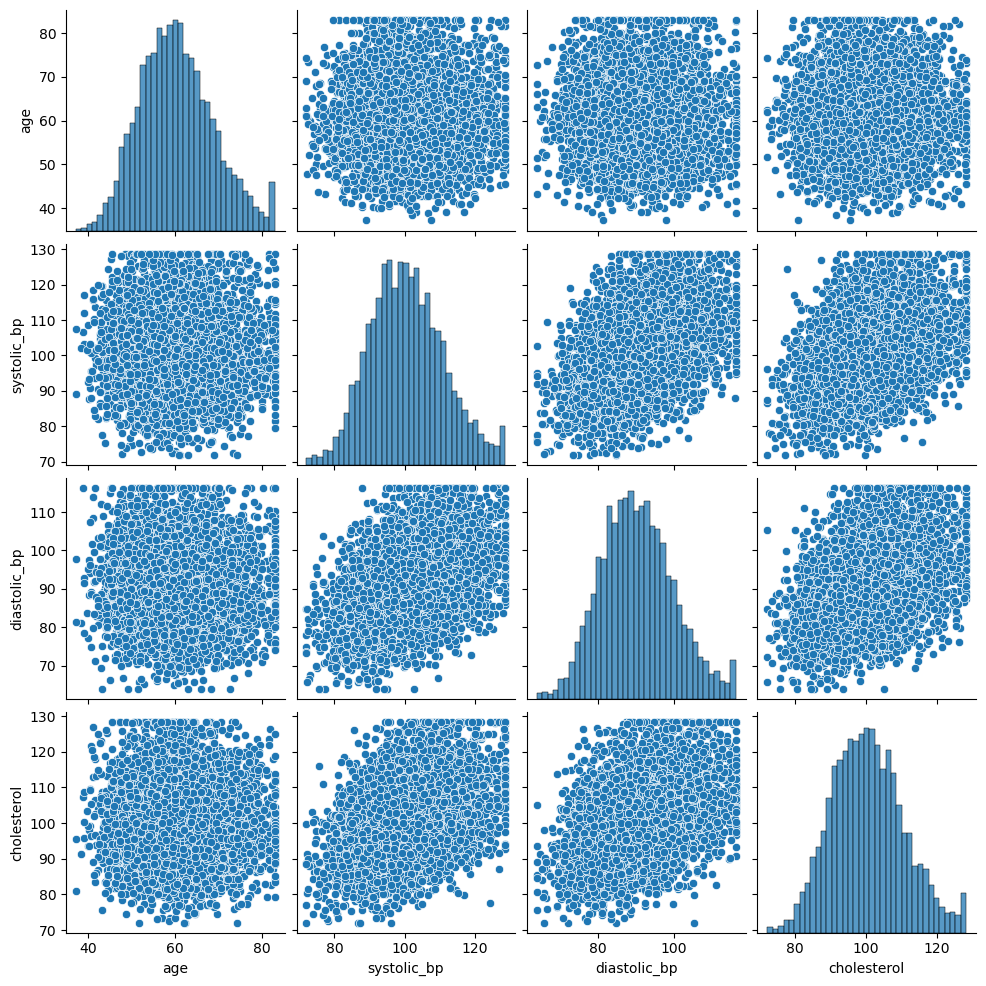

In [17]:
# Pairplot
sns.pairplot(df1)

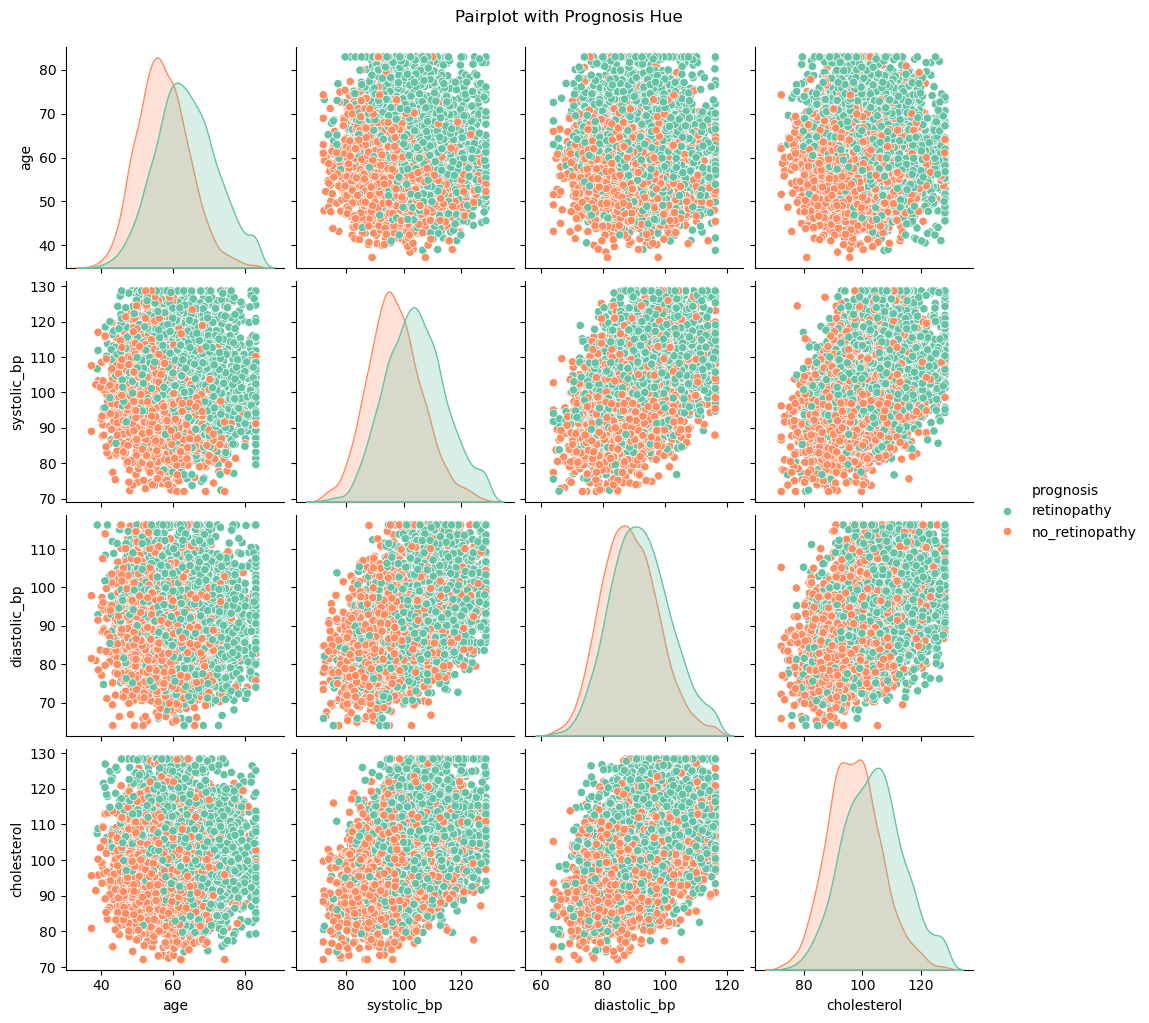

In [18]:
sns.pairplot(df1, hue='prognosis', palette='Set2') 
plt.suptitle("Pairplot with Prognosis Hue", y=1.02)
plt.show()

## Feature Engineering

In [20]:
df1.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [21]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# Loop through all object (categorical) columns
#for col in df1.select_dtypes(include='object').columns:
  #  df1[col] = le.fit_transform(df1[col])


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encoding one column
df1['prognosis'] = le.fit_transform(df1['prognosis'])

# Prognosis is convert the '0 non-Retinopathy' and '1 Retinopathy'

In [23]:
df1.sample(5)

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
2364,54.657854,99.385432,89.743650,90.506751,0
746,60.088774,90.774756,80.758438,103.206689,1
2092,59.871523,104.077438,83.135164,91.252904,1
4857,55.805607,92.465732,86.015512,89.198399,0
1403,79.241608,103.752926,82.781871,102.473870,1


In [24]:
df1.corr()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
age,1.000000,0.009892,-0.005572,-0.006265,0.378763
systolic_bp,0.009892,1.000000,0.407098,0.406643,0.340935
diastolic_bp,-0.005572,0.407098,1.000000,0.398700,0.183138
cholesterol,-0.006265,0.406643,0.398700,1.000000,0.316333
prognosis,0.378763,0.340935,0.183138,0.316333,1.000000


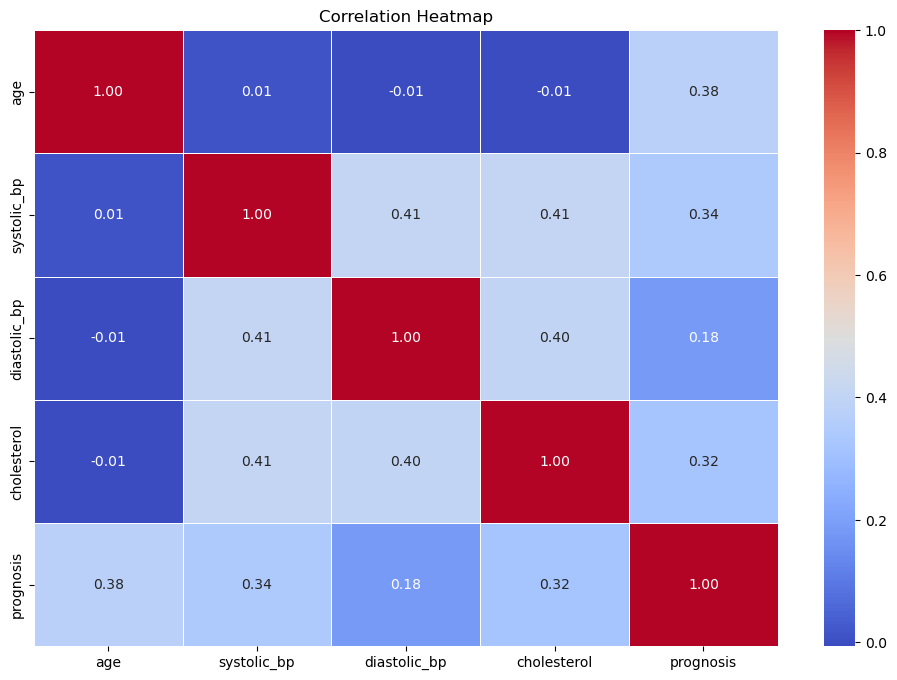

In [25]:
# Compute correlation matrix
corr_matrix = df1.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Model Building

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV ,KFold
from sklearn.metrics import accuracy_score, classification_report

In [28]:
X = df1.drop('prognosis', axis = 1)
y = df1['prognosis']

In [29]:
X.head()

,age,systolic_bp,diastolic_bp,cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: prognosis, dtype: int32

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state = 42)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)


LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
print('accuracy:' , accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred,average = 'weighted'))
print('F1 Score:' , f1_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix:\n' ,confusion_matrix(y_test, y_pred))
print('Classification Report:' , classification_report(y_test, y_pred))

accuracy: 0.7458333333333333
Precision: 0.7461102665154732
Recall: 0.7458333333333333
F1 Score: 0.7459091338837758
Confusion Matrix:
 [[428 147]
 [158 467]]
Classification Report:               precision    recall  f1-score   support

           0       0.73      0.74      0.74       575
           1       0.76      0.75      0.75       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



## Hyperparameter Tuning

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models_params = {
    "Logistic Regression": (
        LogisticRegression(),
        {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric='mlogloss'),
        {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    ),
    "SVM": (
        SVC(),
        {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma' :[50,5,10,0.5]} # Linear, rbf,poly
    ),
    "KNN": (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}  # No hyperparameters to tune
    )
}



In [72]:
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

results = {}
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for name, (model, params) in models_params.items():
    print(f"\nTuning {name}...")

    clf = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_

    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Best Parameters': clf.best_params_
    }

    print(f" Accuracy: {acc:.4f}")
    print(f" Best Params: {clf.best_params_}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



Tuning Logistic Regression...
 Accuracy: 0.7475
 Best Params: {'C': 10, 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       575
           1       0.76      0.75      0.76       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200


Tuning Decision Tree...
 Accuracy: 0.7483
 Best Params: {'criterion': 'entropy', 'max_depth': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       575
           1       0.77      0.74      0.75       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200


Tuning Random Forest...
 Accuracy: 0.7483
 Best Params: {'max_depth': 5, 'n_estimators': 100}
Classific

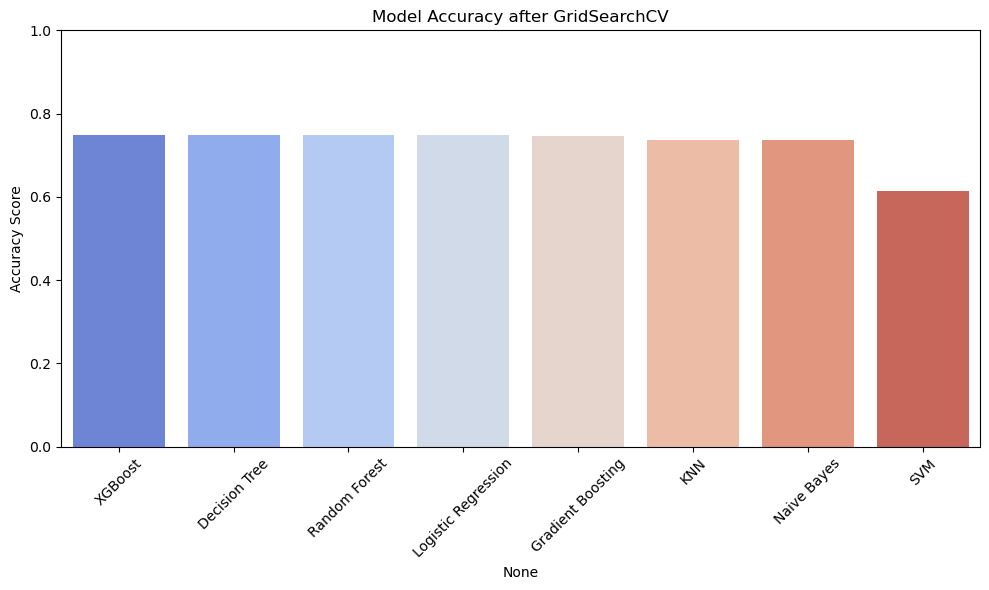

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy summary
acc_df = pd.DataFrame({k: v['Accuracy'] for k, v in results.items()}, index=['Accuracy']).T.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=acc_df.index, hue = 'index',y='Accuracy', data=acc_df.reset_index(), palette='coolwarm')
plt.title("Model Accuracy after GridSearchCV")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Example: Save best Random Forest
best_rf = models_params["XGBoost"][0].set_params(**results["XGBoost"]["Best Parameters"])
best_rf.fit(X_train, y_train)
joblib.dump(best_rf, "best_XGBoost_model.pkl")
